In [2]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

import sys, os
sys.path.append(os.path.dirname(os.path.abspath('')))
sys.path.append(os.path.join(os.path.abspath(''),'..','scripts'))
sys.path.append(os.path.join(os.path.abspath(''),'..','src'))

from Experiment import *
from Analyzer import *
from Artist import *
artist = Artist()
names = {"satgreedy": "SatGreedy", "all_greedy": "AllGreedy", "single_greedy": "SingleGreedy", "single_greedy_celf": "SingleGreedy CELF"}

In [90]:
df = Analyzer("minnesota").df

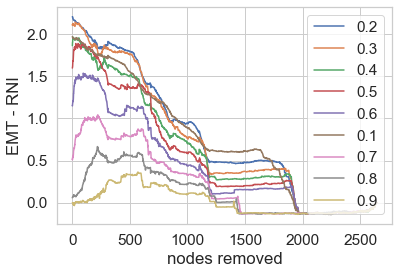

In [92]:
results = df
for r in results['weight_scale'].unique():
    d = results[results['weight_scale'] == r]
    a1 = []
    a2 = []
    
    rni = d[d['mode'] == 0]
    emf = d[d['mode'] == 5]
    a2 = np.amin([emf.loc[i,'sequence'] for i in emf.index],axis=0)
    a1 = np.amin([rni.loc[i,'sequence'] for i in rni.index],axis=0)
    
    a3 = (a2-a1)/a1
    plt.plot(a3, label=r)
    plt.xlabel("nodes removed")
    plt.ylabel("EMT - RNI")
plt.legend()

In [46]:
results = Analyzer("minnesota_sat_seeds").df

Text(0, 0.5, '$\\mathcal{I}$')

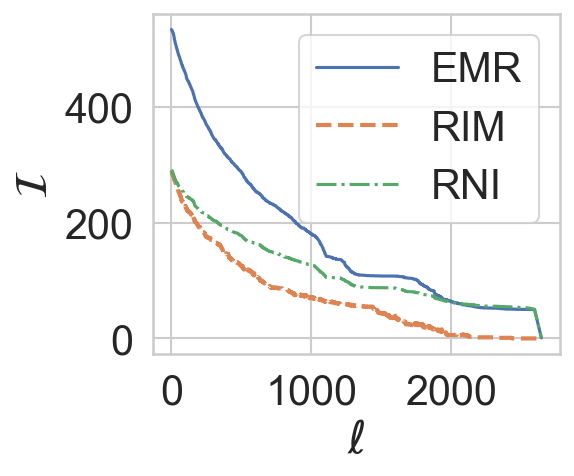

In [47]:
names = {"satgreedy": "SatGreedy", "all_greedy": "AllGreedy", "single_greedy": "SingleGreedy", "single_greedy_celf": "SingleGreedy CELF"}

# web version
# sns.set(style="whitegrid", font_scale=1.4, rc={'axes.grid': True})
# fig = plt.figure(figsize=(4,3), dpi=120)
# ax = fig.add_subplot(1, 1, 1)

# journal version
fig = plt.figure(figsize=(3.5, 3), dpi=150)
sns.set(style="whitegrid", font_scale=1.8, rc={'axes.grid': True})
ax = fig.add_subplot(1, 1, 1)

df = results
df['seeds'] = df['cmd'].apply(lambda x: int(re.match(r".* -s ([0-9]+) .*", x).group(1)))
df = df[df['weight_scale'] == 0.7]
df = df[df['seeds'] == 50]
emf = df[df['mode'] == 5]
emf_seq = np.amin([emf.loc[i,'sequence'] for i in emf.index],axis=0)
ax.plot(emf_seq, label="EMR", linestyle=artist.LINE_STYLES[0])

others = df[df['mode'].isna()]
j = 0
for i in others.index:
    ax.plot(np.array(df.loc[i,"sequence"]), label= "RIM".format(names[df.loc[i,"solver"]]), linestyle=artist.LINE_STYLES[1], linewidth=2.0) #remove linewidth for web version
    j+=1
#     if j == 2:
#         break #two redundant results

rni = df[df['mode'] == 0]
rni_seq = np.amin([rni.loc[i,'sequence'] for i in rni.index],axis=0)
ax.plot(rni_seq, label="RNI", linestyle=artist.LINE_STYLES[2])



# plt.xlim((0,1500))
# plt.ylim((0,800))
ax.legend()

# web version
# plt.xlabel("$\ell$ [nodes removed]")
# plt.ylabel("Number of active nodes")

plt.xlabel("$\ell$")
plt.ylabel(r'$\mathcal{I}$')

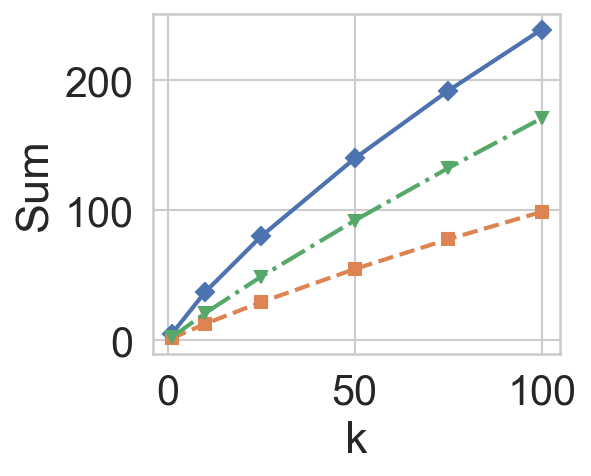

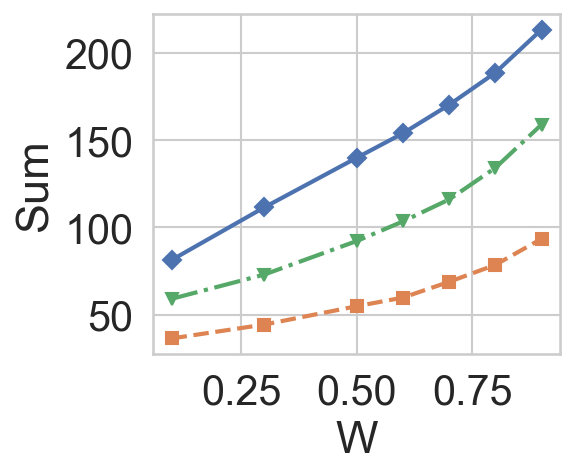

In [70]:
df = results
df = df[df['weight_scale'] != 0.75]
df = df[df['weight_scale'] != 0.85]
res = pd.DataFrame()
df['seeds'] = df['cmd'].apply(lambda x: int(re.match(r".* -s ([0-9]+) .*", x).group(1)))

all_params = ["seeds", "weight_scale"]
defaults = {
    "seeds": 50,
    "weight_scale": 0.5
}

def fix_other_params(variable, df, defaults):
    for p in defaults:
        if p == variable:
            continue
        df = df[df[p] == defaults[p]]
    return df

param_names = {"seeds": "k", "weight_scale": "W"}
for param in all_params:
    for p in df[param].unique():
        dd = df[df[param] == p]
        dd = fix_other_params(param, dd, defaults)

        emf = dd[dd['mode'] == 5]
        emf_seq = np.amin([emf.loc[i,'sequence'] for i in emf.index],axis=0)
        res = res.append({"Active nodes": sum(emf_seq)/dd.iloc[0]['n'], param: p, "Solver": "SEMR"}, ignore_index=True)

        emf = dd[dd['mode'] == 0]
        emf_seq = np.amin([emf.loc[i,'sequence'] for i in emf.index],axis=0)
        res = res.append({"Active nodes": sum(emf_seq)/dd.iloc[0]['n'], param: p, "Solver": "SRNI"}, ignore_index=True)

        emf = dd[dd['mode'].isna()]
        for i in emf.index:
            res = res.append({"Active nodes": sum(emf.loc[i,'sequence'])/dd.iloc[0]['n'], param: p, "Solver": "SRIM"}, ignore_index=True)
            
    #plot
    
    # web version
#     sns.set(style="whitegrid", font_scale=1.4, rc={'axes.grid': True})
#     fig = plt.figure(figsize=(4,3), dpi=120)
#     ax = fig.add_subplot(1, 1, 1)
    
    # journal version
    fig = plt.figure(figsize=(3.5, 3), dpi=150)
    sns.set(style="whitegrid", font_scale=1.8, rc={'axes.grid': True})
    ax = fig.add_subplot(1, 1, 1)

    res = pd.DataFrame(res)
    res = res.sort_values(param)
    i = 0
    for s in res.groupby('Solver'):
        plt.plot(s[1][param],s[1]['Active nodes'],label=s[0],linestyle=artist.LINE_STYLES[i],marker=artist.markers[i], linewidth=2.0) # remove linewidth for web version
        i += 1
#     plt.legend()
    ax.set_xlabel(param_names[param])
    ax.set_ylabel("Sum")
#     ax.set_ylim((0,250))
    plt.show()

In [49]:
def get_adversary_sequences(df):
    listdic = df
    d = {}
    for el in listdic:
        if el == None:
            continue
        for sname in el:
            if sname not in d:
                d[sname] = []
            d[sname].append(el[sname])
    return d

seeds 1


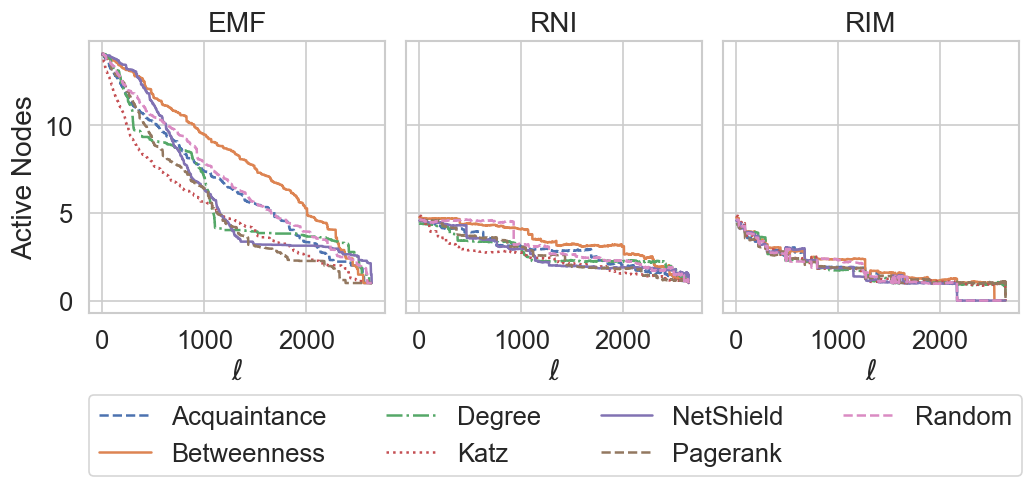

seeds 10


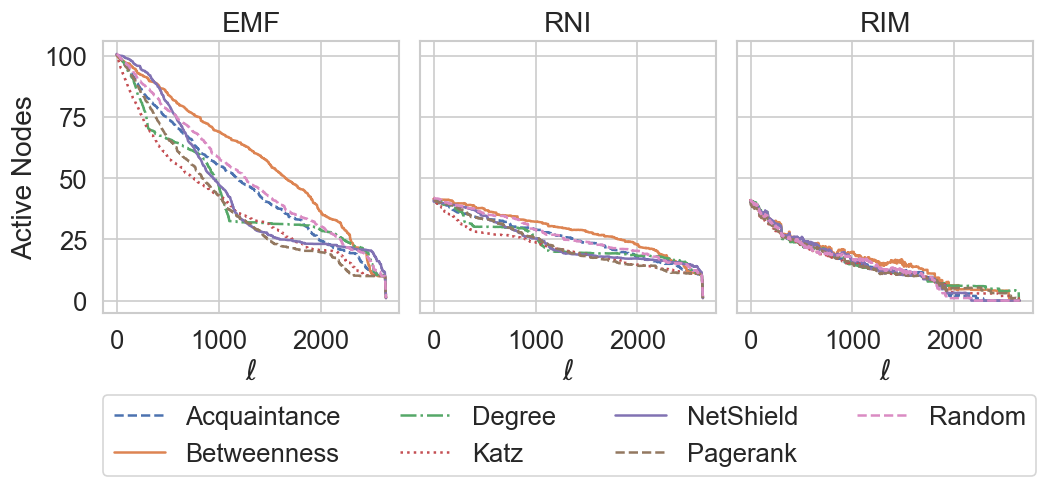

seeds 25


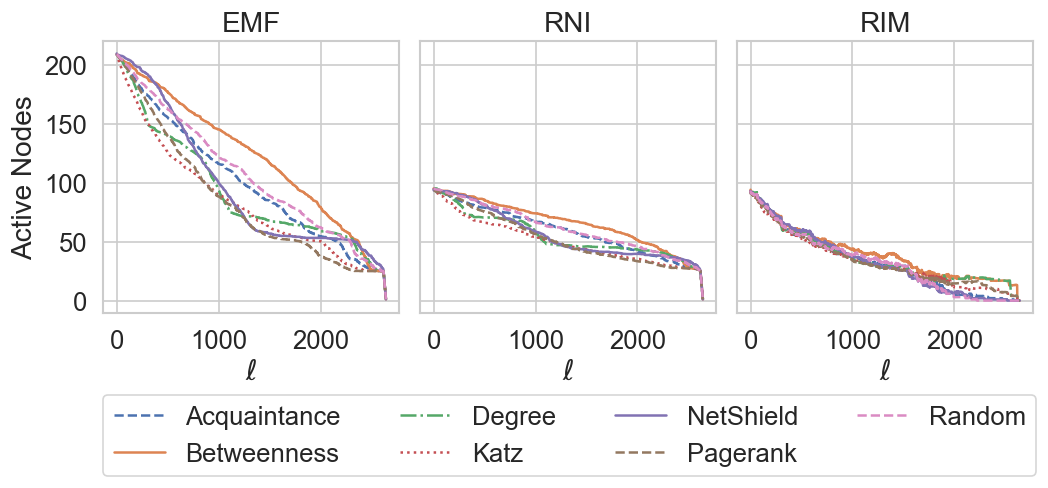

seeds 75


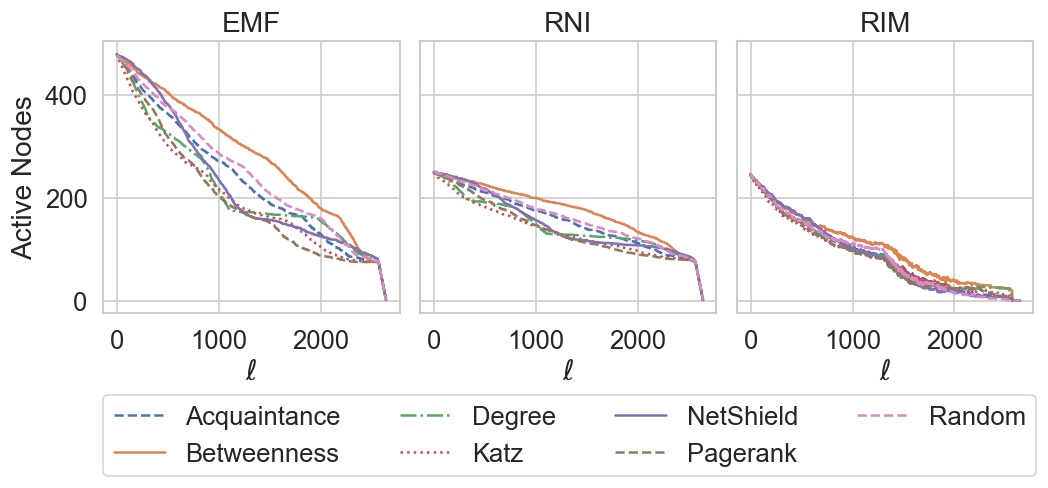

seeds 100


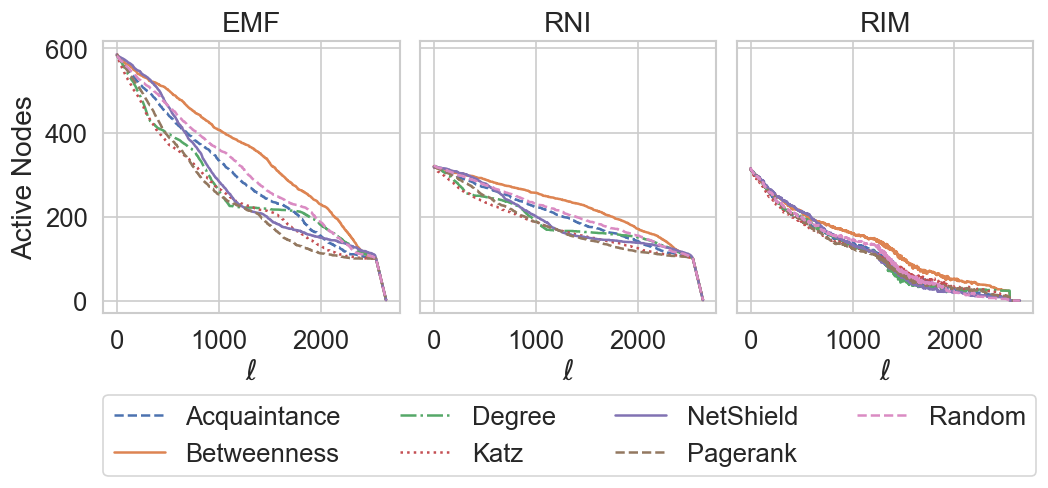

seeds 50


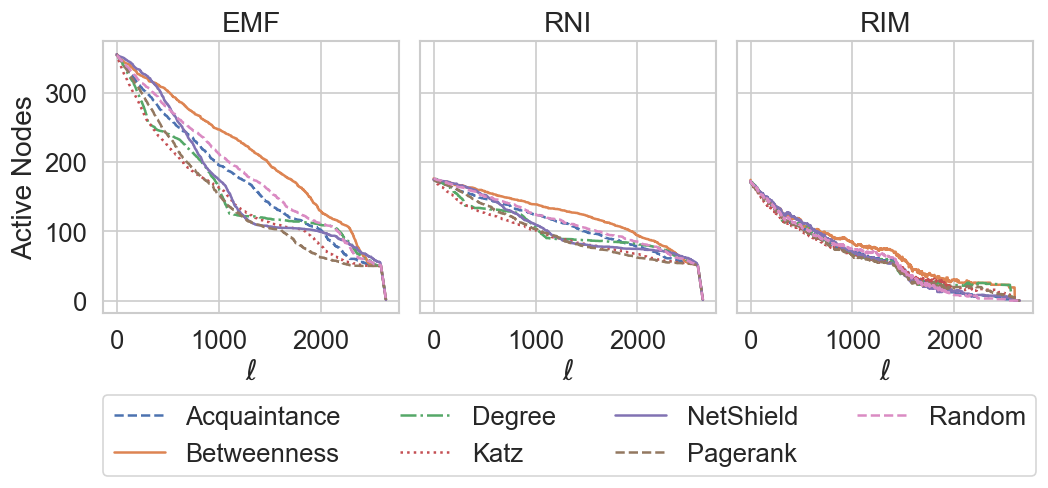

weight_scale 0.1


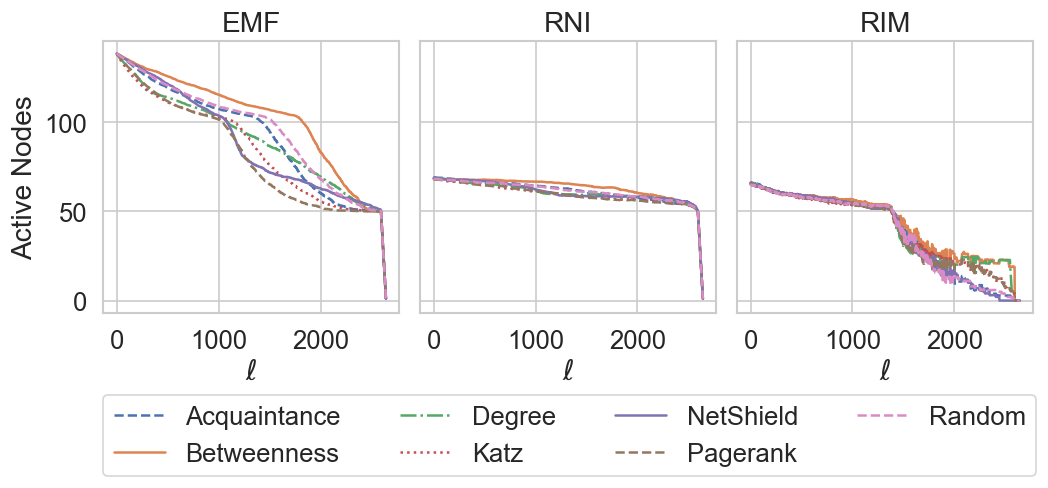

weight_scale 0.3


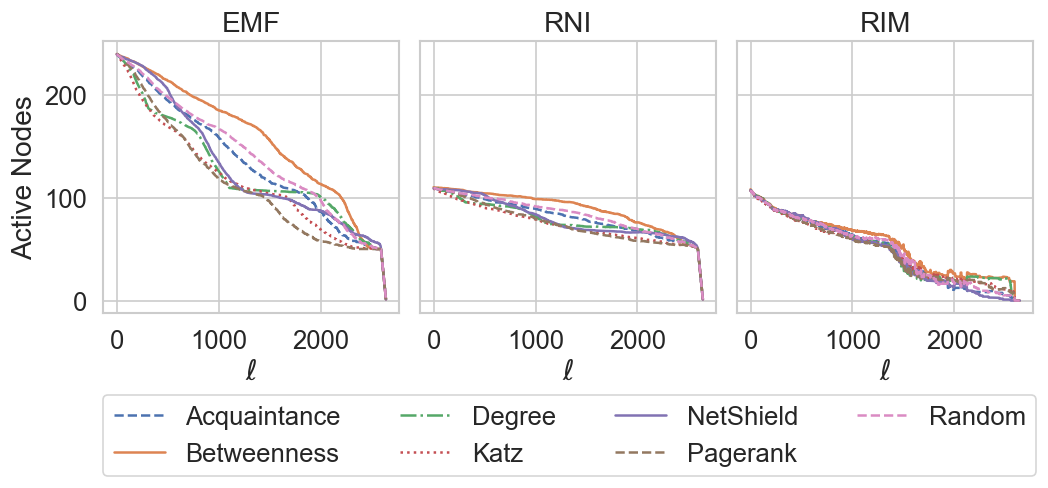

weight_scale 0.6


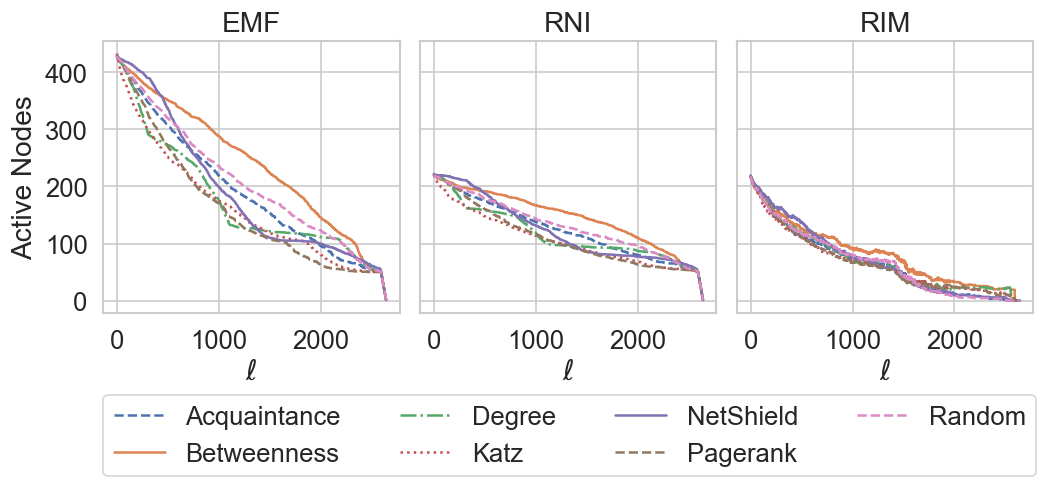

weight_scale 0.7


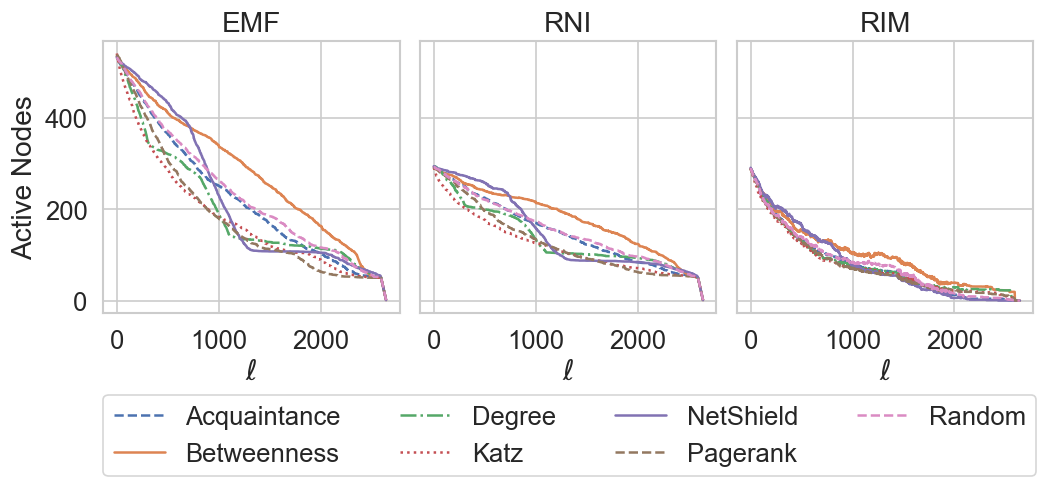

weight_scale 0.8


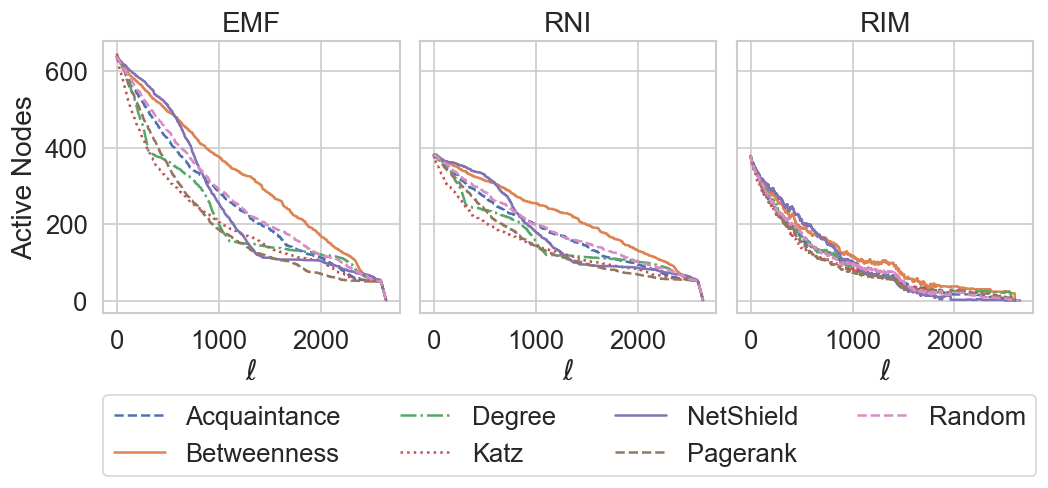

weight_scale 0.5


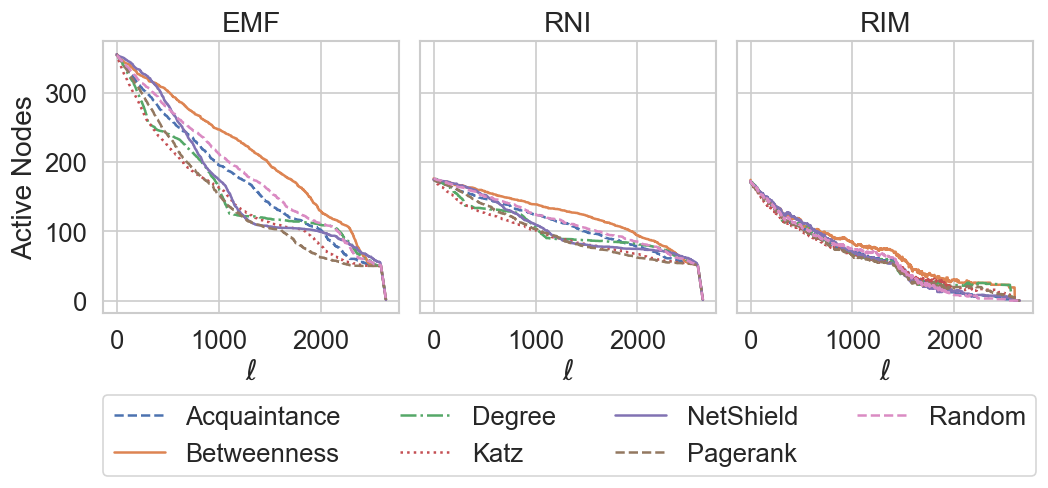

weight_scale 0.9


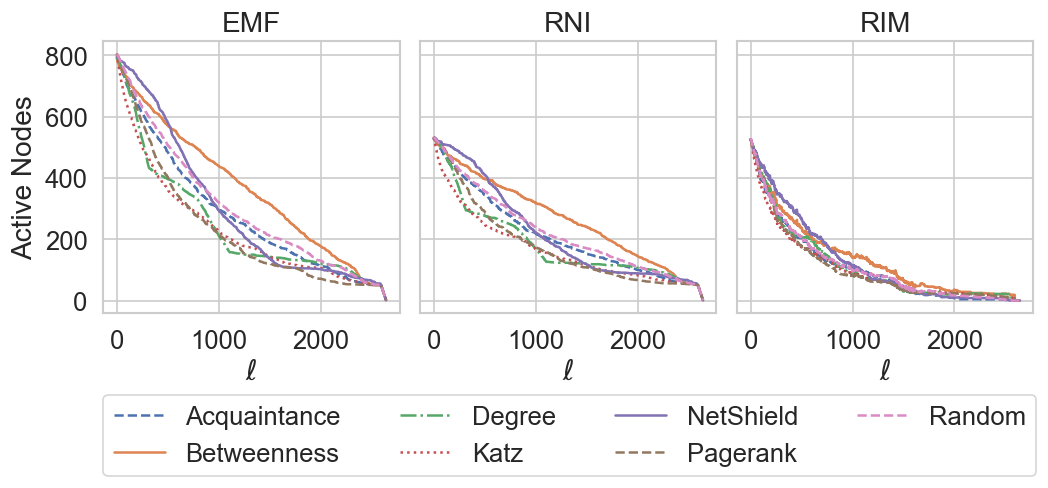

In [50]:
# plot lines 
sns.set(style="whitegrid", font_scale=1.4, rc={'axes.grid': True})
# results = results.sort_values("solver")
def mapn(s):
    if s == "Aquaintance":
        return "Acquaintance"
    else:
        return s

for param in all_params:
    for p in df[param].unique():
        fig, axs = plt.subplots(1, 3, sharey=True, dpi=120, figsize=(10,3))
        fig.subplots_adjust(wspace=0.07)
        dd = df[df[param] == p]
        dd = fix_other_params(param, dd, defaults)
        dd = dd.sort_values("solver")

        emf = dd[dd['mode'] == 5]
        lineid = 0
        for adv_ind in emf['solver'].index:
            axs[0].plot(emf.loc[adv_ind,'sequence'],label=mapn(emf.loc[adv_ind,'solver']),linestyle=artist.markers_and_lines[lineid][0])
            lineid = (lineid + 1) % len(artist.markers_and_lines)
            
            
        lineid = 0
        emf = dd[dd['mode'] == 0]
        for adv_ind in emf['solver'].index:
            axs[1].plot(emf.loc[adv_ind,'sequence'],label=mapn(emf.loc[adv_ind,'solver']),linestyle=artist.markers_and_lines[lineid][0])
            lineid = (lineid + 1) % len(artist.markers_and_lines)
            
        lineid = 0
        emf = dd[dd['mode'].isna()]
        for i in emf['solver'].index:
            d = get_adversary_sequences(emf.loc[i,'objective_per_adversary'])
            for sname in d:
                axs[2].plot(np.array(d[sname])*emf.iloc[0]['n'],label=mapn(sname),linestyle=artist.markers_and_lines[lineid][0])
                lineid = (lineid + 1) % len(artist.markers_and_lines)
            
        axs[0].set_title("EMF")
        axs[1].set_title("RNI")
        axs[2].set_title("RIM")
        axs[0].legend(bbox_to_anchor=(0., -0.6, 3.15, .102), loc=3, ncol=4, mode="expand", borderaxespad=0.)
#         axs[2].legend(bbox_to_anchor=(-1.6, 0.6, 2.8, .102), loc=3, ncol=4, mode="expand", borderaxespad=0.)
#         axs[0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#         axs[2].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        axs[0].set_ylabel("Active Nodes")
        print(param, p)
        axs[0].set_xlabel("$\ell$")
        axs[1].set_xlabel("$\ell$")
        axs[2].set_xlabel("$\ell$")
        plt.show()

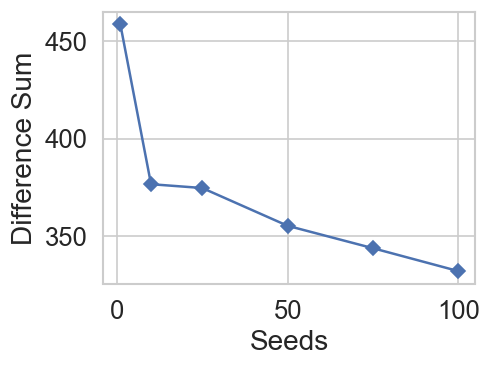

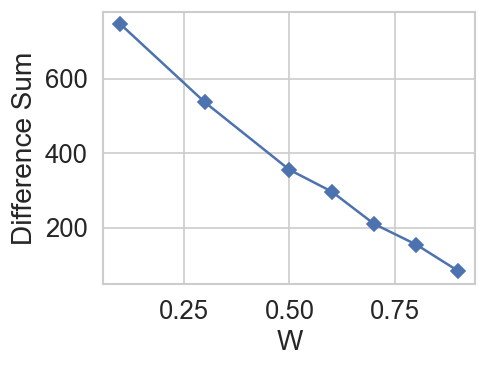

In [51]:
param_names = {"seeds": "Seeds", "weight_scale": "W"}
res = []
for param in all_params:
    res = pd.DataFrame()
    for p in df[param].unique():
        dd = df[df[param] == p]
        dd = fix_other_params(param, dd, defaults)

        emf = dd[dd['mode'] == 5]
        s1 = np.amin([emf.loc[i,'sequence'] for i in emf.index],axis=0)

        emf = dd[dd['mode'] == 0]
        s2 = np.amin([emf.loc[i,'sequence'] for i in emf.index],axis=0)
        
        s3 = (-s1+s1[0])/s1[0] - (-s2+s2[0])/s2[0]
        res = res.append({"Active nodes": sum(s3), param: p, "Solver": "SRNI"}, ignore_index=True)
            
    #plot
    sns.set(style="whitegrid", font_scale=1.4, rc={'axes.grid': True})
    fig = plt.figure(figsize=(4,3), dpi=120)
    ax = fig.add_subplot(1, 1, 1)

    res = res.sort_values(param)
    i = 0
    for s in res.groupby('Solver'):
        plt.plot(s[1][param],s[1]['Active nodes'],label=s[0],linestyle=artist.LINE_STYLES[i],marker=artist.markers[i])
        i += 1
#     plt.legend()
    ax.set_xlabel(param_names[param])
    ax.set_ylabel("Difference Sum")
    plt.show()

In [52]:
from scipy.stats import entropy
from numpy.linalg import norm
import numpy as np

def JSD(P, Q):
    _P = P / norm(P, ord=1)
    _Q = Q / norm(Q, ord=1)
    _M = 0.5 * (_P + _Q)
    return 0.5 * (entropy(_P, _M) + entropy(_Q, _M))

def moving_average(signal, period):
    buffer = [np.nan] * period
    for i in range(period,len(signal)):
        buffer.append(signal[i-period:i].mean())
    return buffer

('EMR', 'RNI')


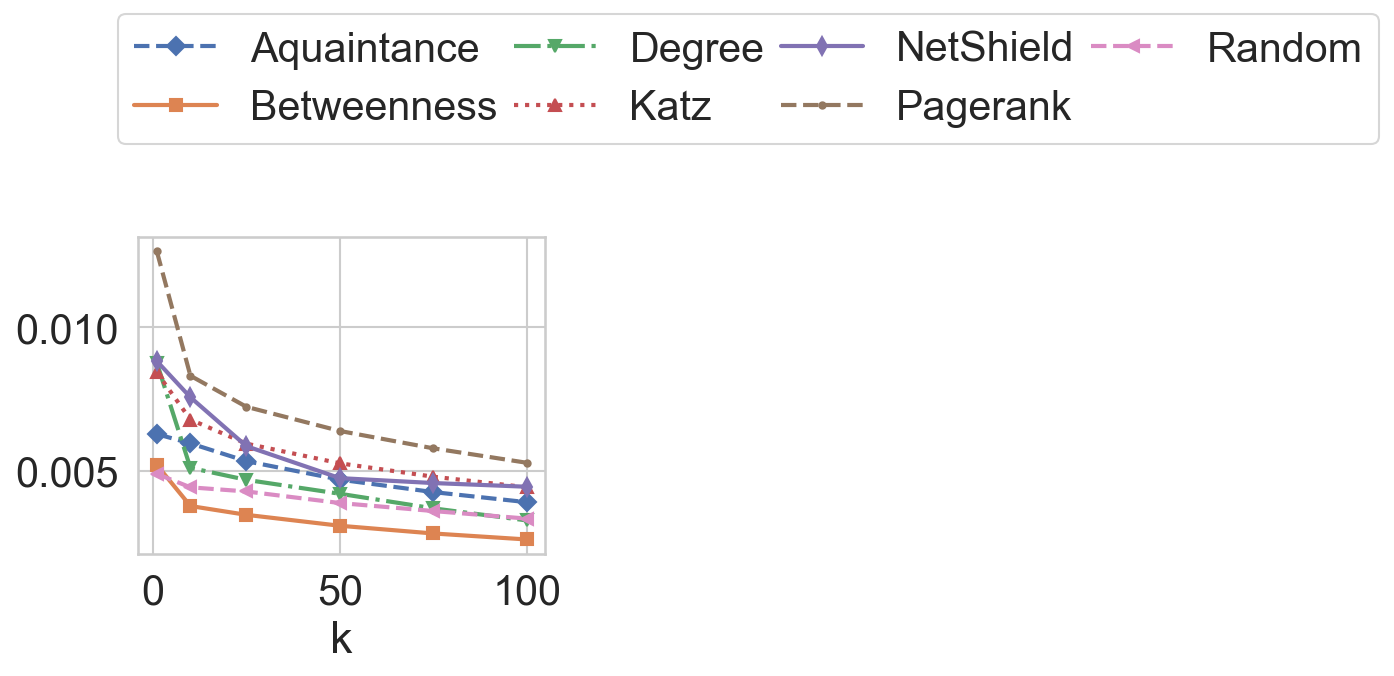

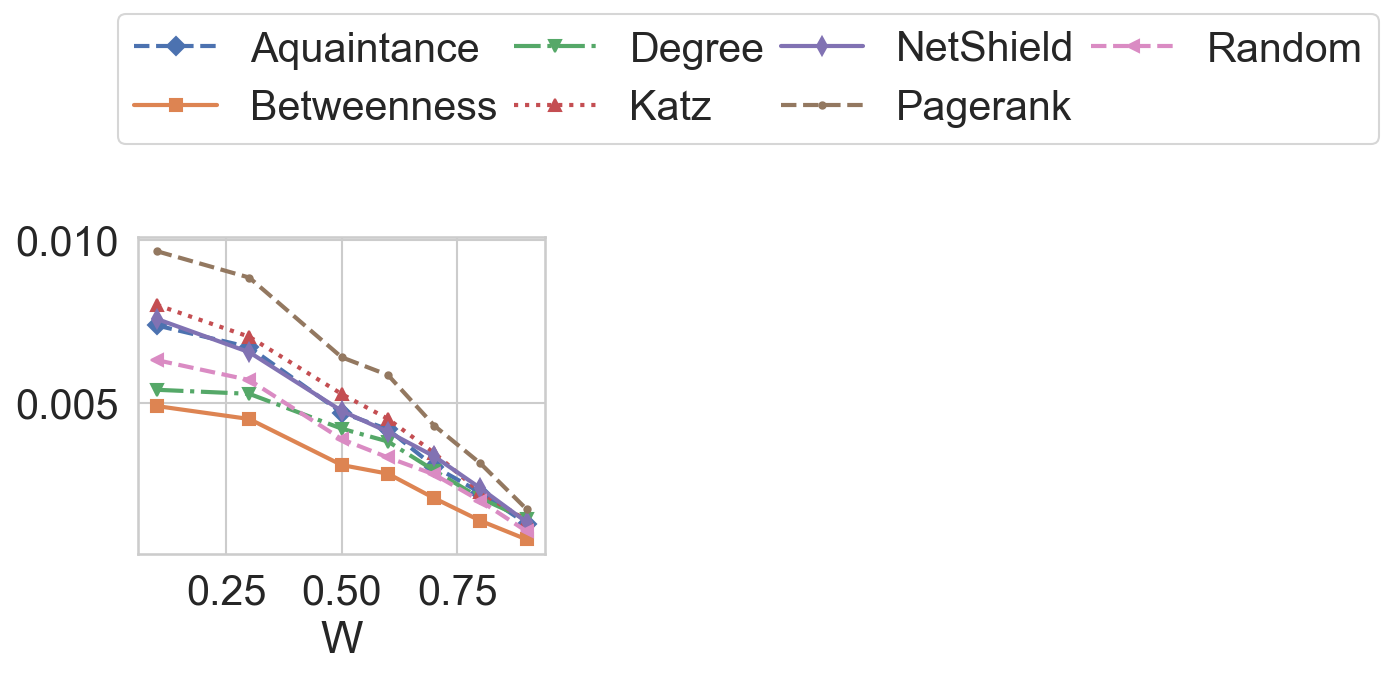

In [85]:
# you must run all of above to run this. data is old, so rerunnning experiment might need a fix of the script

combinations = [('EMR','RNI'), ('EMR', 'RIM'), ('RNI', 'RIM')]
param_names['seeds'] = 'k'
for combination in combinations:
    print(combination)
    for param in all_params:
        r = {}
        for p in sorted(df[param].unique()):
            dd = df[df[param] == p]
            dd = dd.sort_values(param)
            dd = fix_other_params(param, dd, defaults)
            dd = dd.sort_values("solver")

            emf = dd[dd['mode'].isna()]
            assert(len(emf) == 1)
            for i in emf['solver'].index:
                d = get_adversary_sequences(emf.loc[i,'objective_per_adversary'])


            for s in dd['solver'].unique():
                emf = dd[dd['solver'] == s]
                if len(emf[emf['mode'] == 5]) == 0:
                    continue
                    
                if combination[0] == 'RNI':
                    s1 = np.array(emf[emf['mode'] == 0].iloc[0]['sequence']) 
                if combination[0] == 'EMR':
                    s1 = np.array(emf[emf['mode'] == 5].iloc[0]['sequence'])
                if combination[1] == 'RNI':
                    s2 = np.array(emf[emf['mode'] == 0].iloc[0]['sequence'])
                if combination[1] == 'RIM':
                    s2 = np.array(d[s])*emf.iloc[0]['n']

                js_div = JSD(s1[:len(s2)], s2)
                if s not in r:
                    r[s] = []
                r[s].append((p, js_div))

        sns.set(style="whitegrid", font_scale=1.8, rc={'axes.grid': True})
        fig = plt.figure(figsize=(3.5,2.8), dpi=150)
        ax = fig.add_subplot(1, 1, 1)
        i = 0
        for s in r:
            r[s] = np.array(r[s])
            ax.plot(r[s][:,0], r[s][:,1], label=s, marker=artist.markers[i],
                     linestyle=artist.markers_and_lines[i%len(artist.markers_and_lines)][0],linewidth=2)
            i += 1
        ax.set_xlabel(param_names[param])
#         ax.set_ylabel("JSD")
        ax.legend(bbox_to_anchor=(-0.05, 1.2, 3.1, .502), loc=1, ncol=4, mode="expand", borderaxespad=0.)
        plt.show()
    break

# Scalability

In [26]:
result = Analyzer('minnesota_alpha').df

In [27]:
result.columns

Index(['Aquaintance total time', 'Betweenness total time', 'Degree total time',
       'Katz total time', 'NetShield total time', 'Pagerank total time',
       'Random total time', 'Total imm time', '_id', 'adjlist_path',
       'adversaries_size', 'adversary file', 'alpha', 'beta',
       'both_directions', 'cmd', 'dag traversal', 'dim_time', 'dimbeta',
       'epsilon', 'filename', 'gamma', 'gg_m', 'graph', 'graph_id',
       'graph_type', 'm', 'mode', 'n', 'number_of_blocked_nodes',
       'pickle_path', 'random_weight', 'related_obj_id', 'rob', 'rob_std',
       'rr_sets', 'runtime', 's', 'samples_blocked_values', 'scc size',
       'seeds', 'sequence', 'solution_path', 'solver', 'solver_params', 'tag',
       'time_for_label_updates', 'time_for_node_insertion', 'weight_scale',
       'zero_blocked_treesize_sequence', 'objective_per_adversary', 'time'],
      dtype='object')

In [28]:
result[result['alpha'] == 1][result['mode'] == 0]['Total imm time'].sum()

/Users/au624601/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


1.6414844989776611

In [29]:
result = result[result['alpha'] < 1.15]

In [30]:
from scipy.stats import entropy
from scipy.interpolate import CubicSpline
from numpy.linalg import norm
import numpy as np
from sklearn.metrics import r2_score

def get_all_fake_values(y, x, n):
    cs = CubicSpline(x, y, extrapolate=True)
    return np.array(cs(range(n)))

def JSD(P, Q):
    _P = P / norm(P, ord=1)
    _Q = Q / norm(Q, ord=1)
    _P[_P <= 0] = 1
    _Q[_Q <= 0] = 1
    
    _M = 0.5 * (_P + _Q)
    return 0.5 * (entropy(_P, _M) + entropy(_Q, _M))

def rel_diff(true_y, false_y):
    return r2_score(true_y, false_y)

def get_adversary_sequences(df):
    listdic = df
    d = {}
    for el in listdic:
        if el == None:
            continue
        for sname in el:
            if sname not in d:
                d[sname] = []
            d[sname].append(el[sname])
    return d

In [31]:

rr = []
for mode in [0,5]:
    df = result
    r = {}
    r2 = {}
    r3 = {}
    for s in sorted(df['solver'].unique()):
        if s == "single_greedy_celf":
            continue
        df = result
        df = df[df['mode'] == mode]
        df = df[df['solver'] == s]

        assert(len(df[df['alpha']==1]) == 1)
        true_values = df[df['alpha']==1].iloc[0]['sequence']
        for alpha in df['alpha'].unique():
            assert(len(df[df['alpha']==alpha]) == 1)
            fake_values = df[df['alpha']==alpha].iloc[0]['sequence']
            fake_x = df[df['alpha']==alpha].iloc[0]['samples_blocked_values']
            fake_all = get_all_fake_values(fake_values, fake_x, len(true_values))
            if alpha not in r:
                r[alpha] = 0
#                 r[alpha] = 1
                r3[alpha] = 0
            r[alpha] += rel_diff(true_values, fake_all)
#             r[alpha] = min(rel_diff(true_values, fake_all), r[alpha])
#             r[alpha] += JSD(true_values, fake_all)
            r2[alpha] = len(fake_x)
            r3[alpha] += df[df['alpha']==alpha].iloc[0]['runtime']/10**9
    #         print(alpha,rel_diff(true_values, fake_all))
    r = [(alpha, r[alpha]/(len(result['solver'].unique())-1)) for alpha in r]
#     r = [(alpha, r[alpha]) for alpha in r]

    r3 = [(alpha, r3[alpha]/(len(result['solver'].unique())-1)) for alpha in r3]
    r2 = [(alpha, r2[alpha]) for alpha in r2]
    r = pd.DataFrame(r)
    r = r.sort_values(0)
    r2 = pd.DataFrame(r2)
    r2 = r2.sort_values(0)
    r3 = pd.DataFrame(r3)
    r3 = r3.sort_values(0)
    rr.append((r,r2,r3))
    


r = {}
r2 = {}
r3 = {}

df = result
df = df[df['mode'].isna()]

assert(len(df[df['alpha']==1]) == 1)
true_values = get_adversary_sequences(df[df['alpha']==1].iloc[0]['objective_per_adversary'])
for alpha in df['alpha'].unique():
    dd = df[df['alpha'] == alpha]
    assert(len(dd) == 1)
    d = get_adversary_sequences(dd.iloc[0]['objective_per_adversary'])
    fake_x = dd.iloc[0]['samples_blocked_values']
    for s in d:
        fake_values = d[s]
        fake_all = get_all_fake_values(fake_values, fake_x[:len(fake_values)], len(true_values[s]))
        if alpha not in r:
            r[alpha] = 0
#             r[alpha] = 1
            r3[alpha] = 0
        r[alpha] += rel_diff(true_values[s], fake_all)
#         r[alpha] += JSD(true_values[s], fake_all)
#         r[alpha] = min(rel_diff(true_values[s], fake_all), r[alpha])
        r2[alpha] = len(fake_x)
    r3[alpha] = (df[df['alpha']==alpha].iloc[0]['time'] + df[df['alpha']==alpha].iloc[0]['dim_time'])/10**9


r = [(alpha, r[alpha]/(len(result['solver'].unique())-1)) for alpha in r]
# r = [(alpha, r[alpha]) for alpha in r]
r3 = [(alpha, r3[alpha]/(len(result['solver'].unique())-1)) for alpha in r3]
r2 = [(alpha, r2[alpha]) for alpha in r2]
r = pd.DataFrame(r)
r = r.sort_values(0)
r2 = pd.DataFrame(r2)
r2 = r2.sort_values(0)
r3 = pd.DataFrame(r3)
r3 = r3.sort_values(0)
rr.append((r,r2,r3))

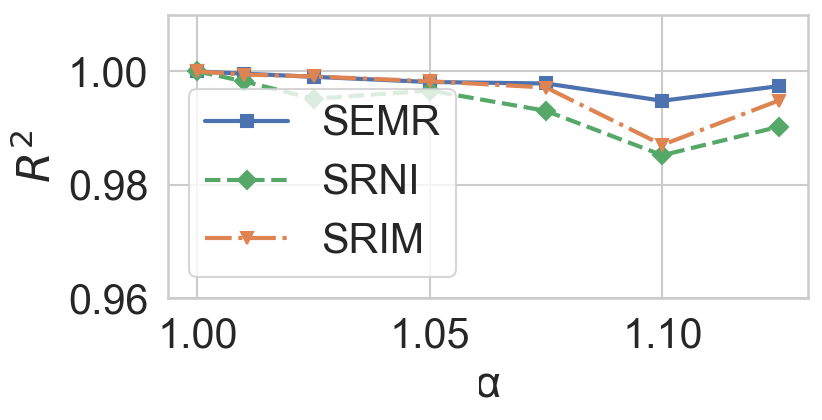

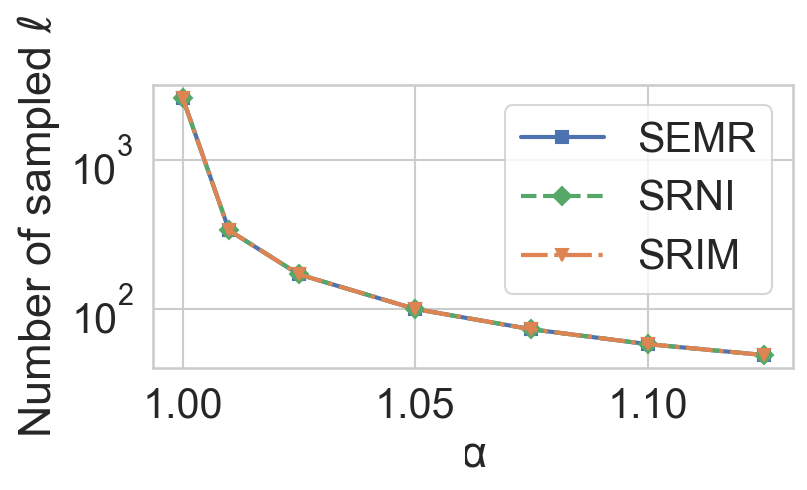

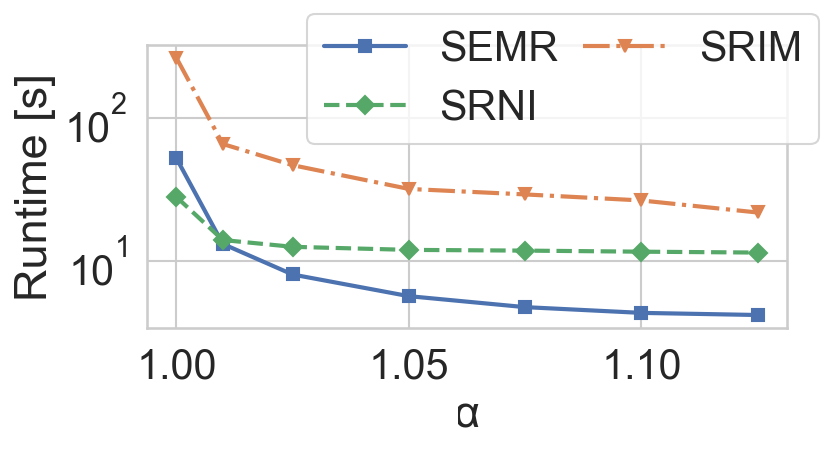

In [35]:
# sns.set(style="whitegrid", font_scale=1.4, rc={'axes.grid': True})
sns.set(style="whitegrid", font_scale=1.8, rc={'axes.grid': True})
current_palette = sns.color_palette()
# fig = plt.figure(figsize=(4,3), dpi=120)
lw=2
fig = plt.figure(figsize=(5.5, 2.5), dpi=150)
ax = fig.add_subplot(1, 1, 1)
ax.plot(rr[1][0][0], rr[1][0][1], label="SEMR", marker=artist.markers[1], linestyle=artist.markers_and_lines[1][0],linewidth=lw)
ax.plot(rr[0][0][0], rr[0][0][1], label="SRNI", marker=artist.markers[0], linestyle=artist.markers_and_lines[0][0], color=current_palette[2],linewidth=lw)
ax.plot(rr[2][0][0], rr[2][0][1], label="SRIM", marker=artist.markers[2], linestyle=artist.markers_and_lines[2][0],linewidth=lw)
# ax.set_yscale("log")
ax.set_ylim((0.96,1.01))
ax.set_ylabel("$R^2$")
ax.set_xlabel("α")
ax.legend()
plt.show()

# fig = plt.figure(figsize=(4,3), dpi=120)
fig = plt.figure(figsize=(5.5, 2.5), dpi=150)
ax = fig.add_subplot(1, 1, 1)
ax.plot(rr[1][1][0], rr[1][1][1], label="SEMR", marker=artist.markers[1], linestyle=artist.markers_and_lines[1][0],linewidth=lw)
ax.plot(rr[0][1][0], rr[0][1][1], label="SRNI", marker=artist.markers[0], linestyle=artist.markers_and_lines[0][0], color=current_palette[2],linewidth=lw)
ax.plot(rr[2][1][0], rr[2][1][1], label="SRIM", marker=artist.markers[2], linestyle=artist.markers_and_lines[2][0],linewidth=lw)
ax.set_yscale("log")
ax.set_ylabel("Number of sampled $\ell$")
ax.set_xlabel("α")
ax.legend()
plt.show()


# fig = plt.figure(figsize=(4,3), dpi=120)
fig = plt.figure(figsize=(5.5, 2.5), dpi=150)
ax = fig.add_subplot(1, 1, 1)
ax.plot(rr[1][2][0], rr[1][2][1], label="SEMR", marker=artist.markers[1], linestyle=artist.markers_and_lines[1][0],linewidth=lw)
ax.plot(rr[0][2][0], rr[0][2][1], label="SRNI", marker=artist.markers[0], linestyle=artist.markers_and_lines[0][0], color=current_palette[2],linewidth=lw)
ax.plot(rr[2][2][0], rr[2][2][1], label="SRIM", marker=artist.markers[2], linestyle=artist.markers_and_lines[2][0],linewidth=lw)
ax.set_yscale("log")
ax.set_xlabel("α")
ax.set_ylabel("Runtime [s]")
# ax.legend(bbox_to_anchor=(0.6, 0.65, 0.45, 0), loc=0, ncol=1, mode="expand", borderaxespad=0.)
ax.legend(bbox_to_anchor=(0.25, 0.65, 0.8, 0), loc=0, ncol=2, mode="expand", borderaxespad=0.)
plt.show()